In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Found out one additional revolution has been included in all reconstructions. Updating now

In [2]:
root = r"C:\Users\Bruker\Documents\Sandstone"
choose_formatter(False)

In [3]:
# Load .npy files

x1, x2 = 572, 828  # 672, 928
y1, y2 = 300, 556  # 384, 640
z1, z2 = 600, 856  # 384, 640

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "limestoneV3_17_55_12favg",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_0_1_fdk",
    "Rec_0_2_fdk",
    "Rec_0_3_fdk",
    "Rec_0_5_fdk",
    "Rec_0_8_fdk",
    "Rec_0_1_fdk_enhanced_700428728",
    "Rec_0_2_fdk_enhanced_700428728",
    "Rec_0_3_fdk_enhanced_700428728",
    "Rec_0_5_fdk_enhanced_700428728",
    "Rec_0_8_fdk_enhanced_700428728",

]
keys = [
    "gt",
    "17",
    "34",
    "51",
    "85",
    "136",
    "17_enhanced",
    "34_enhanced",
    "51_enhanced",
    "85_enhanced",
    "136_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
    else:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))

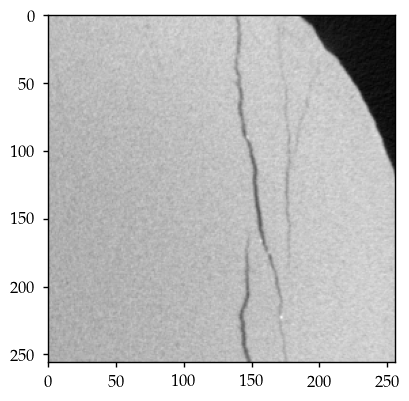

In [122]:
plt.imshow(crossections["gt"][0], cmap="gray")

In [4]:
def evaluate(x,y, normalise=False):

    # Normalises between 0 and 1
    if normalise:
        x = (x- np.min(x)) / (np.max(x)-np.min(x))
        y = (y- np.min(y)) / (np.max(y)-np.min(y))

    ssim = utils.calc_ssim(x, y)
    psnr = utils.calc_psnr(x, y)
    return ssim, psnr

0.7180062367909053 0.8596576619100156
0.339010089635849 0.4037996232509613
0.6685578636334412 0.8130651466812241
0.2794024348258972 0.4023289084434509
0.5292447952225553 0.6372207045602222
0.2821190357208252 0.41393619775772095


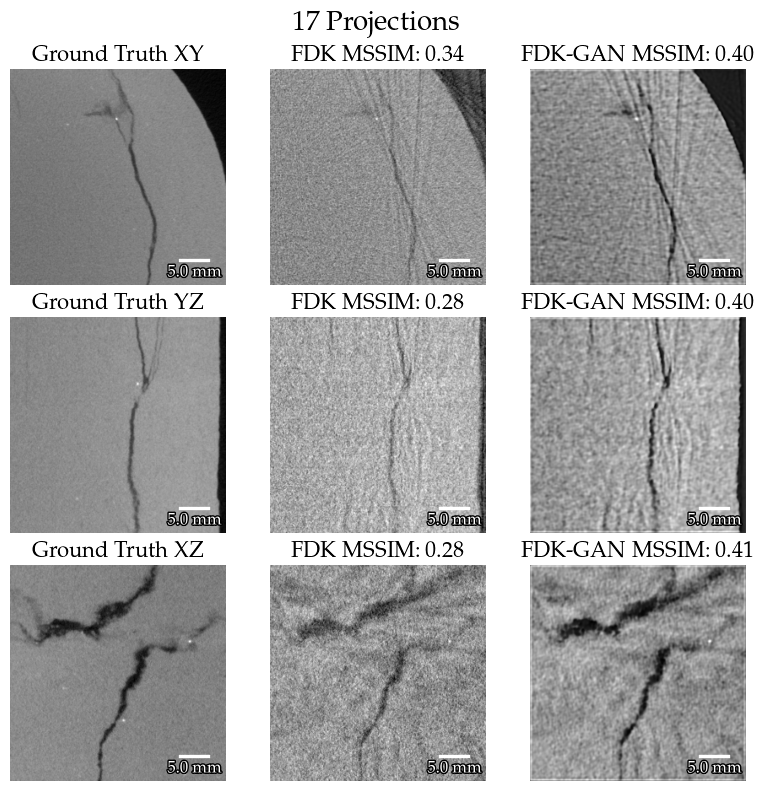

In [168]:
all_slices = []
all_labels = []


h=128
slgt = ( crossections["gt"][h] - np.min(crossections["gt"]) ) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = ( crossections["17"][h] - np.min(crossections["17"]) ) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout = (crossections["17_enhanced"][h] - np.min(crossections["17_enhanced"]) ) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth XY", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])

# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=False,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_17_projections",)

h = 100 

slgt = (crossections["gt"][:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (crossections["17"][:,h] - np.min(crossections["17"])) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout =( crossections["17_enhanced"][:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth YZ", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])


# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=False,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_crossection_17_projections",)


h = 160 

slgt = (crossections["gt"][:,:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (crossections["17"][:,:,h] - np.min(crossections["17"])) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout =( crossections["17_enhanced"][:,:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth XZ", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])



# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=True,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_crossection_17_projections",)


scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}

plot_slice_grid(
    all_slices,
    all_labels,
    bar=True,
    folder ="Sandstone",
    suptitle="17 Projections",
    savefig=False,
    savefile="Sandstone_crossection_17_projections",
    scalebar_kwargs=scale_kwargs,
    fs = (2,2)
)

['Ground Truth XY', 'FDK MSSIM: 0.34', 'FDK-GAN MSSIM: 0.40', 'Ground Truth YZ', 'FDK MSSIM: 0.28', 'FDK-GAN MSSIM: 0.40', 'Ground Truth XZ', 'FDK MSSIM: 0.28', 'FDK-GAN MSSIM: 0.41']


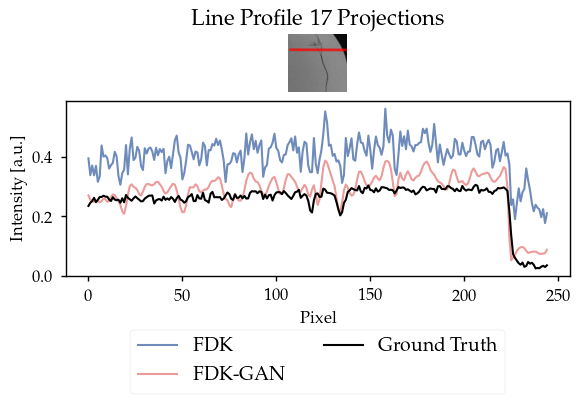

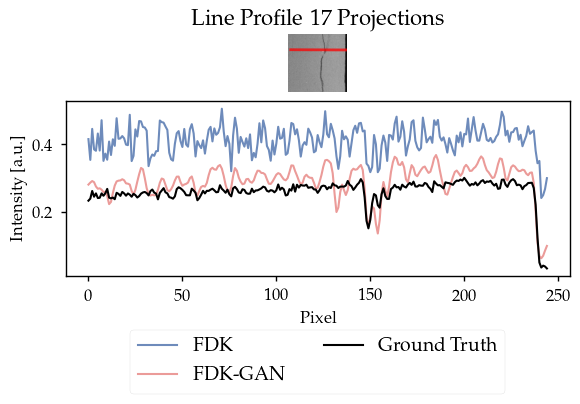

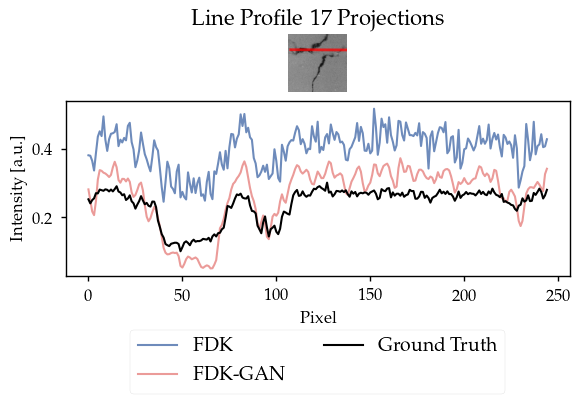

In [169]:
print(all_labels)
for x in range(0, len(all_labels)-2, 3):

    imgs = [all_slices[x+1], all_slices[x+2]]
    line_gt = all_slices[x]
    idxs= [128, 129, 10,255]
    plot_line_profile(imgs, ["FDK", "FDK-GAN"], line_gt, idxs= [69, 70, 10, 255], folder="Sandstone", title="Line Profile 17 Projections", savefig=False, savefile=f"Sandstone_line_profile_17_projections_{x}")

In [ ]:
_, psin = evaluate(slgt, slin, normalise=False)
_,psout = evaluate(slgt, slout, normalise=False)

all_diffs = []
all_diff_labels = []
for x in range(0, len(all_labels)-2, 3):

    _, psin = evaluate(all_slices[x], all_slices[x+1], normalise=False)

    all_diffs.append(all_slices[x+1] - all_slices[x])
    all_diff_labels.append(f"FDK: {psin:.2f}")

    _,psout = evaluate(all_slices[x], all_slices[x+2], normalise=False)

    all_diffs.append(all_slices[x+2] - all_slices[x])
    all_diff_labels.append(f"FDK-GAN: {psout:.2f}")


import matplotlib as mpl

plot_slice_grid(
    all_diffs,
    all_diff_labels,
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=False,
    savefile="Sandstone_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    ns=(3,2),
    fs =(2,1))



plot_slice_grid(
    [ -slgt+slin, -slgt+slout],
    [f"Input PSNR: {psin:.2f}", f"Output PSNR: {psout:.2f}"],
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=False,
    savefile="Sandstone_crossection_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    fs=(1,1))

In [ ]:
fq_keys = ["17", "51", "85", "136", "221"]

tot = 256
evsize = 256

X, Y, Z = np.meshgrid(np.arange(evsize), np.arange(evsize), np.arange(evsize))

radius = np.sqrt((X - evsize//2)**2 + (Y - evsize//2)**2 + (Z-evsize//2)**2).flatten()

uniques = np.unique(radius)




normalise = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

gt_3D = normalise(crossections["gt"])

ins_3D = {}
for k in fq_keys:
    ins_3D[k] = normalise(crossections[k])

outs_3D = {}
for k in fq_keys:
    outs_3D[k+"_enhanced"] = normalise(crossections[k+"_enhanced"])

import utils


print(tot//2)
outputs = [utils.FSC(
    gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    ins_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    sizes=(evsize,evsize,evsize)) for st in fq_keys ]

fq_keys_enhanced = ["17_enhanced", "51_enhanced", "85_enhanced", "136_enhanced", "221_enhanced"]
outputs_enhanced = [utils.FSC(gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2: tot//2+evsize//2], 
                        outs_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
                        sizes=(evsize, evsize, evsize)) for st in fq_keys_enhanced ]

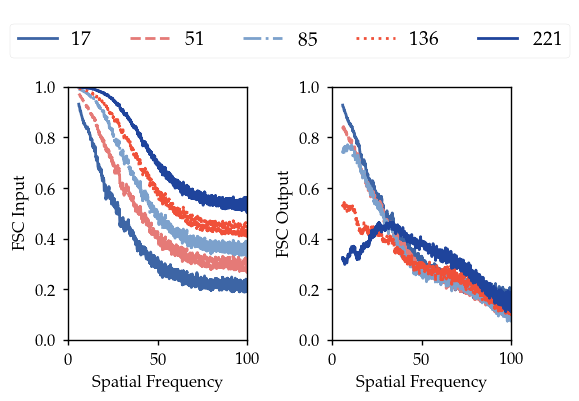

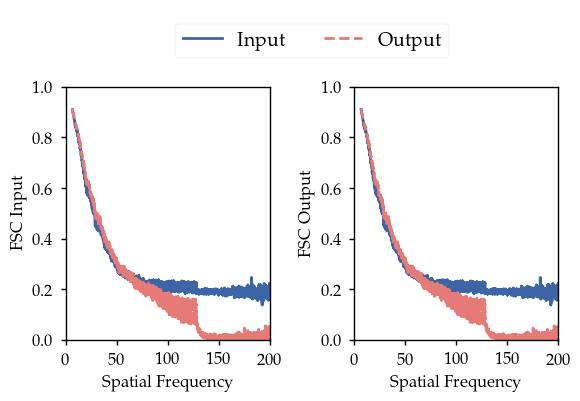

In [178]:
plot_fsc(outputs, outputs_enhanced, uniques, fq_keys, filter=30, xlim=(0,100), ylabel1="FSC Input", ylabel2="FSC Output", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement")

compare = [outputs[0], outputs_enhanced[0]]
plot_fsc( compare, compare, uniques, ["Input", "Output"], filter=40, xlim=(0,200), ylabel1="FSC Input", ylabel2="FSC Output", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement_compare")

In [6]:
identifiers_it = [
    "gt",
    "Rec_0_1_sirt",
]
keys_it = [
    "gt",
    "34",
    ]

it_crossections = {}

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers_it, keys_it)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
    else:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640

    load_name = f"{names[0]}_{identifiers_it[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}{'' if key=='gt' else '_it150' }.npy"
    load_path = os.path.join(root, load_name)
    it_crossections[key]= np.squeeze(np.load(load_path))

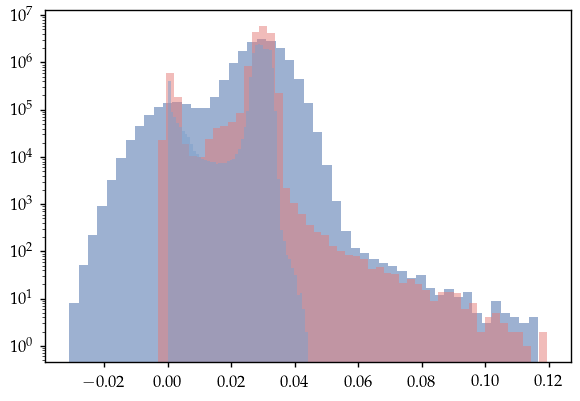

In [51]:
plt.hist(crossections["17"].flatten(), bins=50, alpha=0.5, label="GT",)
plt.hist(crossections["gt"].flatten(), bins=50, alpha=0.5, label="IT",)
plt.hist(it_crossections["17"].flatten(), bins=50, alpha=0.5, label="IT",)
plt.yscale("log")

0.0 1.0
SSIM 0: 0.76, 0.74, 0.81
SSIM 1: 0.69, 0.83, 0.75
SSIM 2: 0.50, 0.64, 0.59


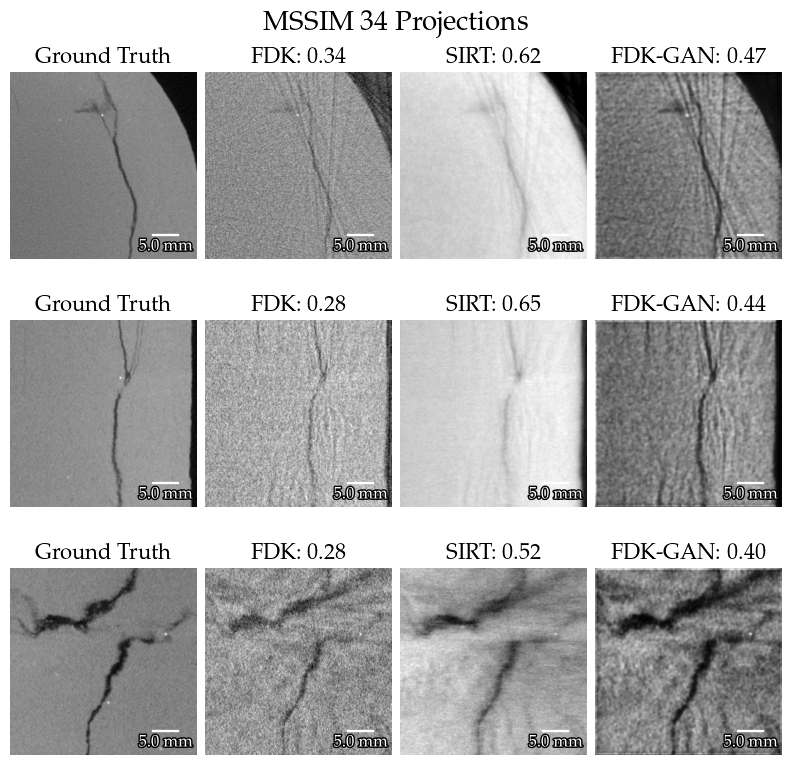

In [10]:
# Test of all in one.
import torchio as tio

all_slices = []
all_labels = []

# slice_norm = lambda x, ref: (x - np.min(ref)) / (np.max(ref) - np.min(ref))
# slice_norm = lambda x, ref : (x-np.mean(ref[0:10, 0:10, -10:])) / (np.mean(ref[10:20, 10:20, 10:20]))
# slice_norm = lambda x, ref : (x-np.min(x)) / (np.max(x) - np.min(x))
# slice_norm = lambda x, ref : (x-np.min(x)) * (np.max(ref) - np.min(ref)) / (np.max(x) - np.min(x)) + np.min(ref)
slice_norm = lambda x, ref : x* (np.max(ref) - np.min(ref)) + np.min(ref)
volume_norm = lambda x, ref : (x-np.min(ref)) / (np.max(ref) - np.min(ref))

print(np.min(crossections["17_enhanced"]), np.max(crossections["17_enhanced"]))




#Current solution is to normalise SIRT and FDK with respect to the GT.
# This is not ideal, because GAN is already normalised. 
 
slice_indexer_x = lambda x, h: x[h]
slice_indexer_y = lambda x, h: x[:,h]
slice_indexer_z = lambda x, h: x[:,:,h]

slice_indexer = [slice_indexer_x, slice_indexer_y, slice_indexer_z]
hs = [128, 100, 160]
key = str(34) #Sandstone not re-reconstructed at this point. Satisfied with number of projections.

for i, si in enumerate(slice_indexer):

    slgt = si(crossections["gt"], hs[i]) # crossections["gt"]) #si(crossections["gt"], hs[i])
    slin = si(crossections[key], hs[i]) # crossections[key]) #si(crossections[key], hs[i])
    slit = si(it_crossections["34"], hs[i]) # it_crossections[key]) #si(it_crossections[key], hs[i])
    slout = slice_norm(si(crossections[key+"_enhanced"], hs[i]), crossections["gt"]) #,  si(crossections[key+"_enhanced"], hs[i]))# crossections[key + "_enhanced"]) #slice_norm(si(crossections[key+"_enhanced"], hs[i]), crossections["gt"])

    all_slices.extend([slgt, slin, slit, slout])

    k=  11
    
    mssin, _ = utils.calc_mssim(slgt, slin, k=k)
    mssit, _ = utils.calc_mssim(slgt, slit, k=k)
    mssout, _ = utils.calc_mssim(  (slgt-np.min(slgt))/(np.max(slgt)-np.min(slgt)) , slout, k=k)    

    all_labels.extend([f"Ground Truth", f"FDK: {mssin:.2f}", f"SIRT: {mssit:.2f}", f"FDK-GAN: {mssout:.2f}"])

    ssin, _ = evaluate(  slgt, slin, normalise=True)  
    ssit, _ = evaluate(  slgt, slit, normalise=True)  
    ssout, _ = evaluate( slgt, slout, normalise=True)

    print(f"SSIM {i}: {ssin:.2f}, {ssit:.2f}, {ssout:.2f}")

scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}
plot_slice_grid(
    all_slices,
    all_labels,
    suptitle=f"MSSIM {str(int(key))} Projections",
    folder="Sandstone",
    savefile="Slice_grid_Sandstone_enhancement",
    savefig=False,
    bar = True,
    scalebar_kwargs=scale_kwargs,
    fs = (2,2),
    ns = (3,4)    
)



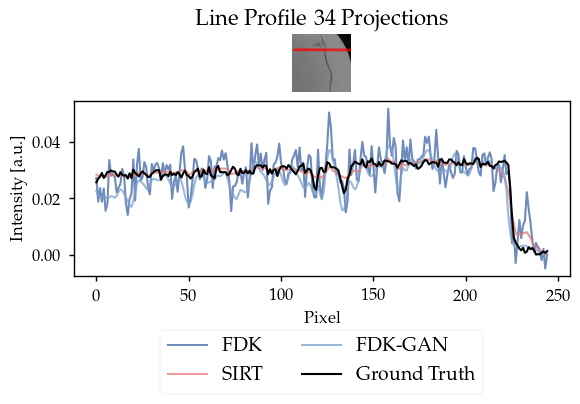

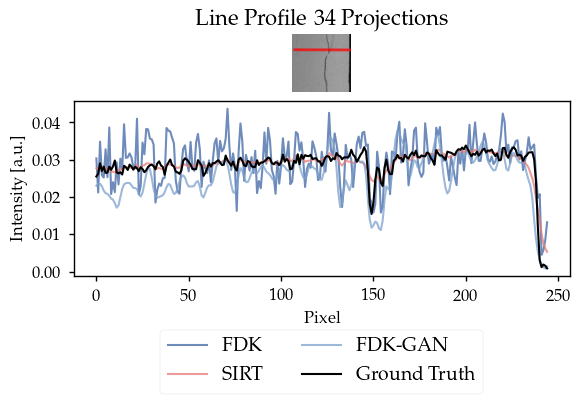

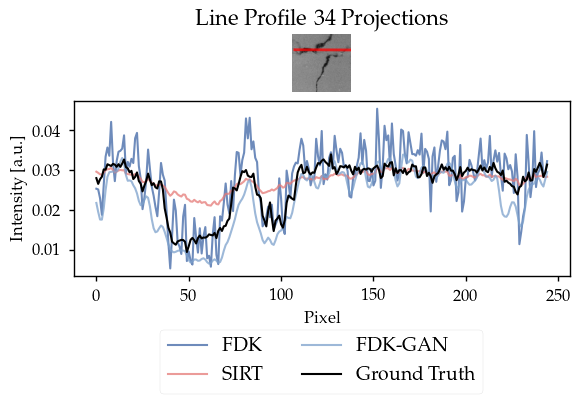

In [11]:
for x in range(0, len(all_labels)-3, 4):
    #Needs to be rerun, was saved. 

    imgs = [all_slices[x+1], all_slices[x+2], all_slices[x+3]]
    line_gt = all_slices[x]
    plot_line_profile(imgs, ["FDK", "SIRT", "FDK-GAN"], line_gt, idxs= [69, 70, 10, 255], folder="Sandstone", title=f"Line Profile {str(int(key))} Projections", savefig=False, savefile=f"Sandstone_line_profile_17_projections_{x}")



FDK: 20.83
-0.02761899 0.024492707
SIRT: 30.46
-0.028958734 0.014532881
FDK-GAN: 20.82
-0.02429796 0.028378755
FDK: 19.88
-0.021522438 0.022341218
SIRT: 28.31
-0.020580899 0.014601713
FDK-GAN: 19.78
-0.02125489 0.027628321
FDK: 18.73
-0.027737236 0.024727363
SIRT: 26.19
-0.018089186 0.01520182
FDK-GAN: 18.82
-0.023574393 0.020542534


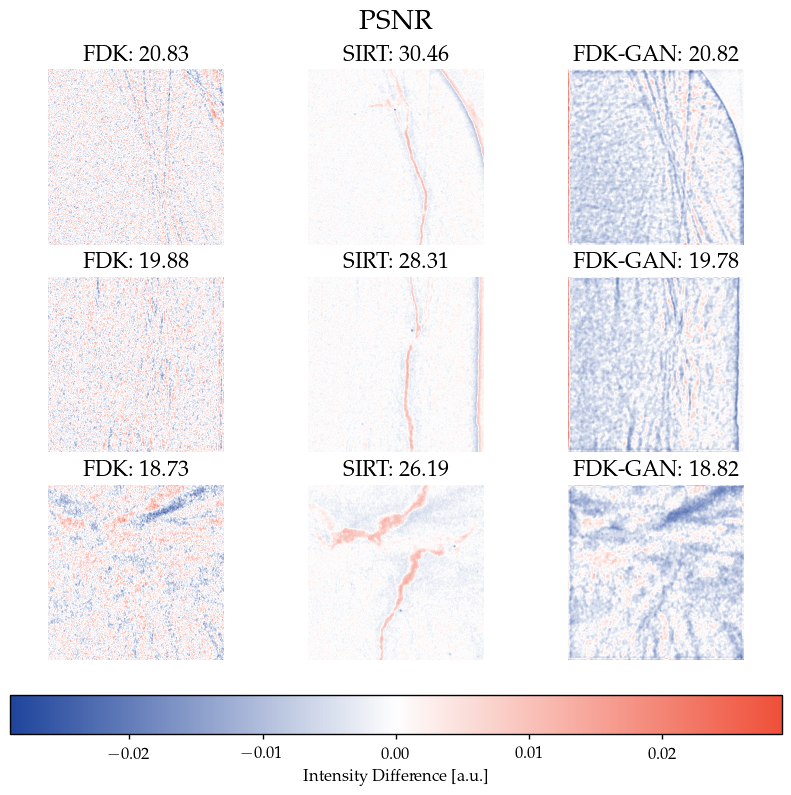

In [12]:
all_diffs = []
all_diff_labels = []
for x in range(0, len(all_labels)-3, 4):

    _, psin = evaluate(all_slices[x], all_slices[x+1], normalise=False)

    all_diffs.append(all_slices[x+1] - all_slices[x])
    all_diff_labels.append(f"FDK: {psin:.2f}")

    _, psit = evaluate(all_slices[x], all_slices[x+2], normalise=False)
    all_diffs.append(all_slices[x+2] - all_slices[x])
    all_diff_labels.append(f"SIRT: {psit:.2f}")

    _,psout = evaluate(all_slices[x], all_slices[x+3], normalise=False)

    all_diffs.append(all_slices[x+3] - all_slices[x])
    all_diff_labels.append(f"FDK-GAN: {psout:.2f}")


import matplotlib as mpl

plot_slice_grid(
    all_diffs,
    all_diff_labels,
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=False,
    savefile="Sandstone_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    two_sided=True,
    ns=(3,3),
    fs =(2,2))

In [38]:
def evaluate(x,y, normalise=False):

    # Normalises between 0 and 1
    if normalise:
        x = (x- np.min(x)) / (np.max(x)-np.min(x))
        y = (y- np.min(y)) / (np.max(y)-np.min(y))

    ssim = utils.calc_ssim(x, y)
    psnr = utils.calc_psnr(x, y)
    return ssim, psnr

ssims = {}
psnrs = {}
mssims = {}

x1, x2 = 0, 256
y1, y2 = 0, 256
z1, z2 = 0, 256

for k, v in crossections.items():
    if k == "gt":
        continue

    ss, ps = evaluate(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2], normalise=True)
    ssims[k] = ss #utils.calc_ssim(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2])
    psnrs[k] = ps #utils.calc_psnr(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2])

    mssim_sum = 0
    for i in range(x2-x1):
        val, _ = utils.calc_mssim(crossections["gt"][x1 + i:x1+ 1 +i, y1:y2, z1:z2], v[x1 + i:x1+ 1 +i, y1:y2, z1:z2])
        mssim_sum += val
    mssims[k] = mssim_sum/(x2-x1)  #utils.calc_mssim(crossections["gt"][h, y1:y2, z1:z2], v[h, y1:y2, z1:z2] ) #mssim_sum / len(v) #



print(ssims)
print(psnrs)
print(mssims)


{'17': 0.5590094443104169, '34': 0.7210126437378914, '51': 0.7950947639274314, '85': 0.8740242950591446, '136': 0.9351936330902456, '17_enhanced': 0.7441728841716768, '34_enhanced': 0.8268521841003332, '51_enhanced': 0.7721790352042358, '85_enhanced': 0.6129923508069527, '136_enhanced': 0.40523630575812164}
{'17': 13.109610289787224, '34': 16.391512759814624, '51': 18.01721917144648, '85': 20.91517566450184, '136': 26.447460246645914, '17_enhanced': 17.859565996814975, '34_enhanced': 26.652793237673556, '51_enhanced': 21.776084674687482, '85_enhanced': 17.517715202708114, '136_enhanced': 15.20232523857386}
{'17': 0.26651743153342977, '34': 0.31473464402370155, '51': 0.3690426618559286, '85': 0.4577792740892619, '136': 0.5473017760086805, '17_enhanced': 0.46459453576244414, '34_enhanced': 0.4463611179962754, '51_enhanced': 0.4636970479041338, '85_enhanced': 0.5067338531371206, '136_enhanced': 0.5251753221964464}


[ 33.12349044  14.67929048  -2.88213805 -29.86552499 -56.6681924 ]
[ 36.23262326  62.60118043  20.86262851 -16.24399678 -42.51877081]


C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting\plots.py:630: RuntimeWarning: divide by zero encountered in divide
  "^",


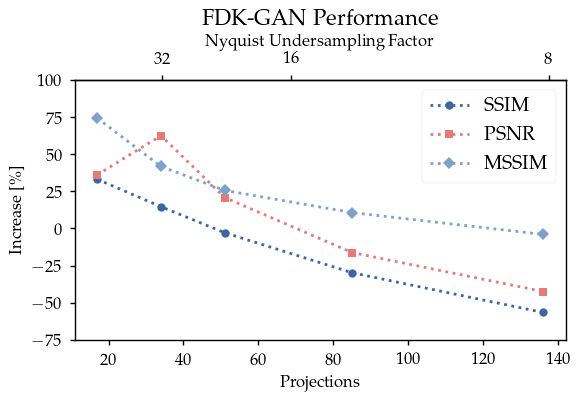

In [39]:
unenhanced = ssims["17"], ssims["34"], ssims["51"], ssims["85"], ssims["136"],# ssims["78"], ssims["91"], ssims["104"]
enhanced = ssims["17_enhanced"], ssims["34_enhanced"], ssims["51_enhanced"], ssims["85_enhanced"], ssims["136_enhanced"],# ssims["78_enhanced"], ssims["91_enhanced"], ssims["104_enhanced"]

increase = (np.array(enhanced) - np.array(unenhanced) )/ np.array(unenhanced)


unenhanced = psnrs["17"], psnrs["34"], psnrs["51"], psnrs["85"], psnrs["136"],# psnrs["78"], psnrs["91"], psnrs["104"]
enhanced = psnrs["17_enhanced"], psnrs["34_enhanced"], psnrs["51_enhanced"], psnrs["85_enhanced"], psnrs["136_enhanced"],# psnrs["78_enhanced"], psnrs["91_enhanced"], psnrs["104_enhanced"]

p_increase = (np.array(enhanced) - np.array(unenhanced) )/ np.array(unenhanced)

print(increase*100)
print(p_increase*100)

unenhanced = mssims["17"], mssims["34"], mssims["51"], mssims["85"], mssims["136"],# mssims["78"], mssims["91"], mssims["104"]
enhanced = mssims["17_enhanced"], mssims["34_enhanced"], mssims["51_enhanced"], mssims["85_enhanced"], mssims["136_enhanced"],# mssims["78_enhanced"], mssims["91_enhanced"], mssims["104_enhanced"]

m_increase = (np.array(enhanced) - np.array(unenhanced) )/ np.array(unenhanced)

plot_attr_development([17,34,51,85, 136], [increase*100, p_increase*100, m_increase*100], ["SSIM", "PSNR", "MSSIM" ], xlabel="Projections", ylabel="Increase [\%]", title="FDK-GAN Performance", folder="Sandstone", save=False, ylim=(-75,100), savefile="FDKGAN_performance_increase", max_width=700)

C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting\plots.py:630: RuntimeWarning: divide by zero encountered in divide
  "^",


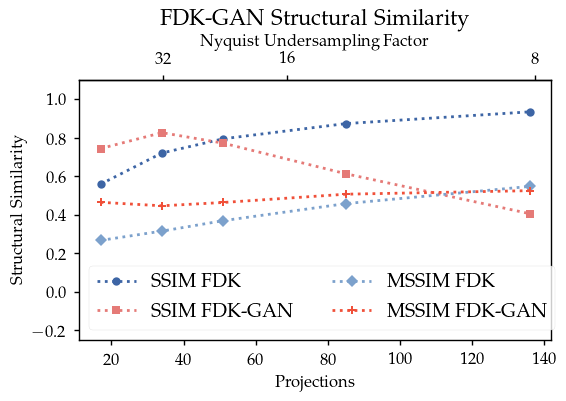

In [40]:
k_in = ["17","34","51","85", "136"]
k_out = ["17_enhanced", "34_enhanced", "51_enhanced", "85_enhanced", "136_enhanced",]# "78_enhanced", "91_enhanced", "104_enhanced"]

unenhanced_ssim = [ssims[k] for k in k_in]
enhanced_ssim = [ssims[k] for k in k_out]

unenhanced_mssim = [mssims[k] for k in k_in]
enhanced_mssim = [mssims[k] for k in k_out]

plot_attr_development(
    [17,34,51,85, 136],
    [unenhanced_ssim, enhanced_ssim, unenhanced_mssim, enhanced_mssim],
    ["SSIM FDK", "SSIM FDK-GAN", "MSSIM FDK", "MSSIM FDK-GAN"],
    xlabel="Projections",
    ylabel="Structural Similarity",
    title="FDK-GAN Structural Similarity",
    folder="Sandstone",
    save=False,
    savefile="GAN_global_performance_ssim_mssim",
    ylim=(-0.25,1.1),
    columns=2,
    max_width=700
)

In [223]:
fq_keys = ["34", "34_enhanced"]

tot = 256
evsize = 256

X, Y, Z = np.meshgrid(np.arange(evsize), np.arange(evsize), np.arange(evsize))

radius = np.sqrt((X - evsize//2)**2 + (Y - evsize//2)**2 + (Z-evsize//2)**2).flatten()

uniques = np.unique(radius)




normalise = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

gt_3D = normalise(crossections["gt"])

ins_3D = {}
for k in fq_keys:
    ins_3D[k] = normalise(crossections[k])

outs_3D = {}
# for k in fq_keys:
outs_3D[fq_keys[0]] = normalise(it_crossections[fq_keys[0]])
outs_3D[fq_keys[1]] = normalise(crossections[fq_keys[1]])

import utils


print(tot//2)
outputs = [utils.FSC(
    gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    ins_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    sizes=(evsize,evsize,evsize)) for st in fq_keys ]

outputs_enhanced = [utils.FSC(gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2: tot//2+evsize//2], 
                        outs_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
                        sizes=(evsize, evsize, evsize)) for st in fq_keys ]

128
(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 6789.96it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 7214.04it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 7500.63it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 7054.87it/s] 


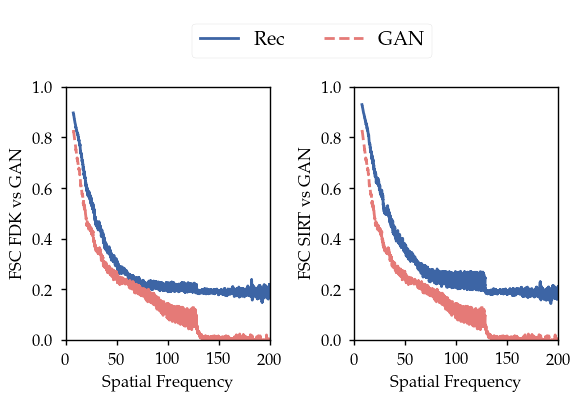

In [224]:
plot_fsc(outputs, outputs_enhanced, uniques, ["Rec", "GAN"], filter=50, xlim=(0,200), ylabel1="FSC FDK vs GAN", ylabel2="FSC SIRT vs GAN", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement")
#Do not understand this one.